# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create an empty list to store the responses
weather_response =[]


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
#Create an empty list to store the responses

# Build partial query URL
for city in range(len(cities)):
    print(f'Processing record for {cities[city]}')
    query_url = f"{url}appid={weather_api_key}&q={cities[city]}"
    data = requests.get(query_url)
    weather_response.append(data.json())
    #city.append(data['name'])
                           

Processing record for victoria
Processing record for umzimvubu
Processing record for taolanaro
Processing record for ahipara
Processing record for busselton
Processing record for rikitea
Processing record for sawakin
Processing record for punta arenas
Processing record for barrow
Processing record for kapaa
Processing record for sovetsk
Processing record for vangaindrano
Processing record for bredasdorp
Processing record for hamilton
Processing record for ushuaia
Processing record for nicoya
Processing record for ratnagiri
Processing record for sinjah
Processing record for rabaul
Processing record for albany
Processing record for teguldet
Processing record for hobart
Processing record for kodiak
Processing record for tuatapere
Processing record for yellowknife
Processing record for san cristobal
Processing record for comodoro rivadavia
Processing record for talnakh
Processing record for ponca city
Processing record for sorland
Processing record for sao filipe
Processing record for balk

Processing record for ouahigouya
Processing record for warqla
Processing record for williston
Processing record for jiddah
Processing record for fort saint john
Processing record for kichmengskiy gorodok
Processing record for lolua
Processing record for quchan
Processing record for leshukonskoye
Processing record for ancud
Processing record for broome
Processing record for lazaro cardenas
Processing record for dieppe bay
Processing record for korla
Processing record for karpathos
Processing record for mukhen
Processing record for champerico
Processing record for codrington
Processing record for puerto ayora
Processing record for inderborskiy
Processing record for dunedin
Processing record for ilulissat
Processing record for novo aripuana
Processing record for kadykchan
Processing record for san carlos de bariloche
Processing record for japura
Processing record for sao jose da coroa grande
Processing record for talcahuano
Processing record for ojinaga
Processing record for havre-saint-p

Processing record for karaton
Processing record for kemijarvi
Processing record for gigmoto
Processing record for pemangkat
Processing record for bankura
Processing record for bay roberts
Processing record for olafsvik
Processing record for smithers
Processing record for norden
Processing record for manokwari
Processing record for san jose
Processing record for sesheke
Processing record for pisco
Processing record for rio tercero
Processing record for sao joao da barra
Processing record for weymouth
Processing record for tungor
Processing record for mecca
Processing record for nanakuli
Processing record for porangatu
Processing record for sur
Processing record for brownsville
Processing record for araouane
Processing record for hilton head island
Processing record for kingston
Processing record for victoria point
Processing record for chifeng
Processing record for khonuu
Processing record for sao sebastiao
Processing record for soloneshnoye
Processing record for hervey bay
Processing r

In [5]:
print(f"We have process {len(weather_response)} cities weather." )

We have process 623 cities weather.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city =[]
lat=[]
lng =[]
maxtemp = []
humidity =[]
cloudiness =[]
windspeed =[]
country = []
date =[]

In [7]:
x = 0
size = len(weather_response)

while x < size:
    try:
        city.append(weather_response[x]['name'])
        lat.append(weather_response[x]['coord']['lat'])
        lng.append(weather_response[x]['coord']['lon'])
        maxtemp.append(weather_response[x]['main']['temp_max'])
        humidity.append(weather_response[x]['main']['humidity'])
        cloudiness.append(weather_response[x]['clouds']['all'])
        windspeed.append(weather_response[x]['wind']['speed'])
        country.append(weather_response[x]['sys']['country'])
        date.append(weather_response[x]['dt'])
    except:
        print('')     
    
    x +=1

In [8]:
weather_data = pd.DataFrame({'City':city,
                            'Latitude':lat,
                            'Longtitude':lng,
                            'Max Temperature':maxtemp,
                            'Humidity':humidity,
                            'Cloudiness':cloudiness,
                            'Wind Speed':windspeed,
                            'Country':country,
                            'Date':date})
                         
weather_data.head()

,City,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hong Kong,22.29,114.16,297.04,78,20,1.50,HK,1586997015
1,Ahipara,-35.17,173.17,291.28,77,29,8.45,NZ,1586997521
2,Busselton,-33.65,115.33,287.04,97,79,3.25,AU,1586997165
3,Rikitea,-23.12,-134.97,298.29,72,100,3.42,PF,1586997166
4,Sawākin,19.11,37.33,295.20,54,0,3.53,SD,1586997685


In [14]:
path = "../output_data/weather_data.csv"
weather_data.to_csv(path)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
city_hum = weather_data['Humidity'] > 100
city_hum

0      False
1      False
2      False
3      False
4      False
       ...  
573    False
574    False
575    False
576    False
577    False
Name: Humidity, Length: 578, dtype: bool

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [13]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

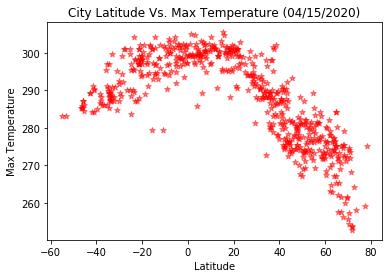

In [15]:
plt.scatter(weather_data['Latitude'],weather_data['Max Temperature'], marker='*',facecolor = 'red',alpha =0.5)
plt.title("City Latitude Vs. Max Temperature (04/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.savefig('../output_data/lat_vs_maxtemp.png')


## Latitude vs. Humidity Plot

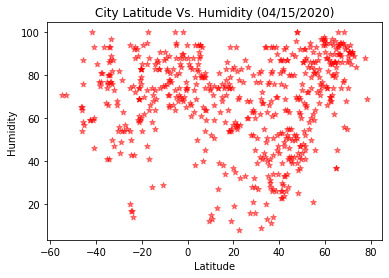

In [16]:
plt.scatter(weather_data['Latitude'],weather_data['Humidity'], marker='*',facecolor = 'red',alpha =0.5)
plt.title("City Latitude Vs. Humidity (04/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig('../output_data/lat_vs_humidity.png')

## Latitude vs. Cloudiness Plot

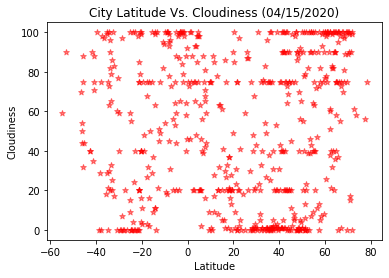

In [17]:
plt.scatter(weather_data['Latitude'],weather_data['Cloudiness'], marker='*',facecolor = 'red',alpha =0.5)
plt.title("City Latitude Vs. Cloudiness (04/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig('../output_data/lat_vs_cloudiness.png')

## Latitude vs. Wind Speed Plot

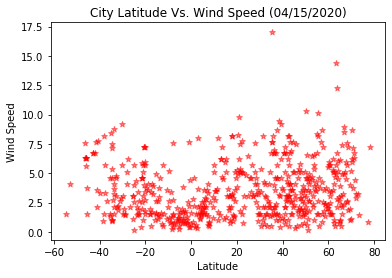

In [18]:
plt.scatter(weather_data['Latitude'],weather_data['Wind Speed'], marker='*',facecolor = 'red',alpha =0.5)
plt.title("City Latitude Vs. Wind Speed (04/15/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('../output_data/lat_vs_windspeed.png')

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots


In [20]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = weather_data[weather_data['Latitude'] >= 0]
south_hem = weather_data[weather_data['Latitude'] < 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7810898835044551


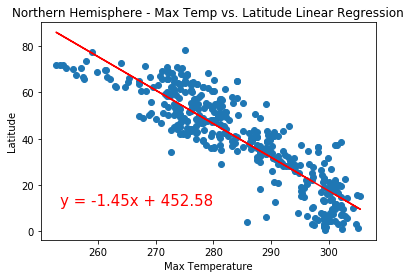

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Max Temperature'],north_hem['Latitude'])
regress_values = (north_hem['Max Temperature']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem['Max Temperature'],north_hem['Latitude'])
plt.plot(north_hem['Max Temperature'],regress_values,"r-")
plt.annotate(line_eq,(280,10),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.481547185996699


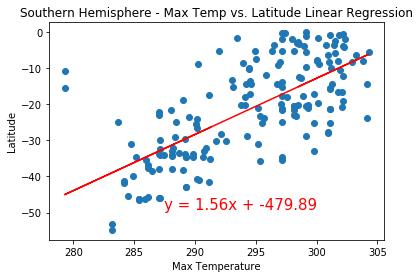

In [22]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Max Temperature'],south_hem['Latitude'])
regress_values = (south_hem['Max Temperature']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem['Max Temperature'],south_hem['Latitude'])
plt.plot(south_hem['Max Temperature'],regress_values,"r-")
plt.annotate(line_eq,(300,-50),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06338144248343372


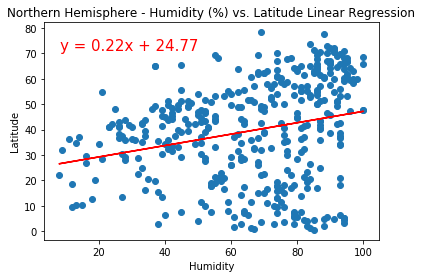

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Humidity'],north_hem['Latitude'])
regress_values = (north_hem['Humidity']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem['Humidity'],north_hem['Latitude'])
plt.plot(north_hem['Humidity'],regress_values,"r-")
plt.annotate(line_eq,(50,70),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03779632864228752


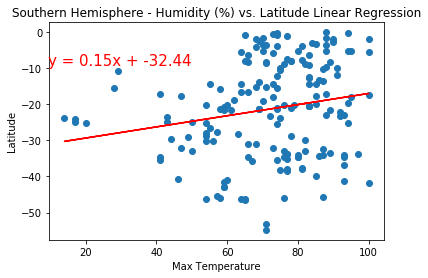

In [24]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Humidity'],south_hem['Latitude'])
regress_values = (south_hem['Humidity']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem['Humidity'],south_hem['Latitude'])
plt.plot(south_hem['Humidity'],regress_values,"r-")
plt.annotate(line_eq,(50,-10),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04763797680145249


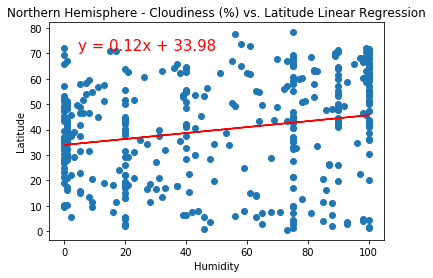

In [25]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Cloudiness'],north_hem['Latitude'])
regress_values = (north_hem['Cloudiness']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem['Cloudiness'],north_hem['Latitude'])
plt.plot(north_hem['Cloudiness'],regress_values,"r-")
plt.annotate(line_eq,(50,70),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02950816029624079


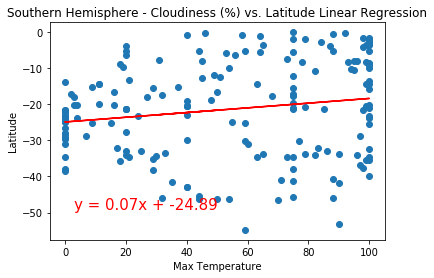

In [26]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Cloudiness'],south_hem['Latitude'])
regress_values = (south_hem['Cloudiness']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem['Cloudiness'],south_hem['Latitude'])
plt.plot(south_hem['Cloudiness'],regress_values,"r-")
plt.annotate(line_eq,(50,-50),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.025176691792042093


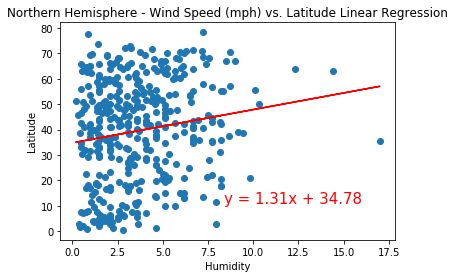

In [30]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem['Wind Speed'],north_hem['Latitude'])
regress_values = (north_hem['Wind Speed']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north_hem['Wind Speed'],north_hem['Latitude'])
plt.plot(north_hem['Wind Speed'],regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Humidity")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20793210893919295


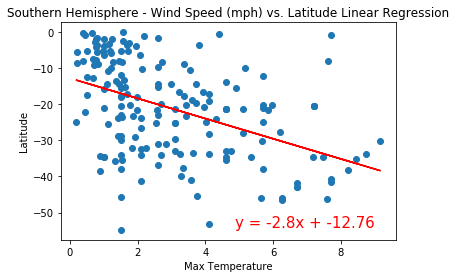

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem['Wind Speed'],south_hem['Latitude'])
regress_values = (south_hem['Wind Speed']) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem['Wind Speed'],south_hem['Latitude'])
plt.plot(south_hem['Wind Speed'],regress_values,"r-")
plt.annotate(line_eq,(9,-55),fontsize=15,color="red",horizontalalignment='right',
            verticalalignment='bottom')
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Max Temperature")
plt.ylabel("Latitude")
print(f"The r-squared is: {rvalue**2}")
plt.show()